In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
olympic_data = pd.read_csv('Summer_Olympic_medals.csv')
olympic_data

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold


In [13]:
olympic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


In [14]:
olympic_data.describe()

,Year
count,15316.000000
mean,1993.620789
std,10.159851
min,1976.000000
25%,1984.000000
50%,1996.000000
75%,2004.000000
max,2008.000000


In [15]:
print(olympic_data.shape)

(15433, 11)


In [16]:
olympic_data.isnull().sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

In [17]:
rows_with_nulls = olympic_data[olympic_data.isnull().any(axis=1)]
print(rows_with_nulls)

    City  Year Sport Discipline Event Athlete Gender Country_Code Country  \
770  NaN   NaN   NaN        NaN   NaN     NaN    NaN          NaN     NaN   
771  NaN   NaN   NaN        NaN   NaN     NaN    NaN          NaN     NaN   
772  NaN   NaN   NaN        NaN   NaN     NaN    NaN          NaN     NaN   
773  NaN   NaN   NaN        NaN   NaN     NaN    NaN          NaN     NaN   
774  NaN   NaN   NaN        NaN   NaN     NaN    NaN          NaN     NaN   
..   ...   ...   ...        ...   ...     ...    ...          ...     ...   
882  NaN   NaN   NaN        NaN   NaN     NaN    NaN          NaN     NaN   
883  NaN   NaN   NaN        NaN   NaN     NaN    NaN          NaN     NaN   
884  NaN   NaN   NaN        NaN   NaN     NaN    NaN          NaN     NaN   
885  NaN   NaN   NaN        NaN   NaN     NaN    NaN          NaN     NaN   
886  NaN   NaN   NaN        NaN   NaN     NaN    NaN          NaN     NaN   

    Event_gender Medal  
770          NaN   NaN  
771          NaN   NaN  


In [18]:
olympic_data.dropna(inplace = True)

In [19]:
olympic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15316 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.4+ MB


In [21]:
country_ranking_with_medals = olympic_data['Country'].value_counts().reset_index()
country_ranking_with_medals.columns = ['Country', 'count']
country_ranking_with_medals = country_ranking_with_medals.sort_values(by='count', ascending=False)
country_ranking_with_medals

,Country,count
0,United States,1992
1,Soviet Union,1021
2,Australia,798
3,Germany,691
4,China,679
...,...,...
108,Eritrea,1
107,Togo,1
106,Mauritius,1
105,Macedonia,1


In [22]:
top_25 = country_ranking_with_medals.head(25)

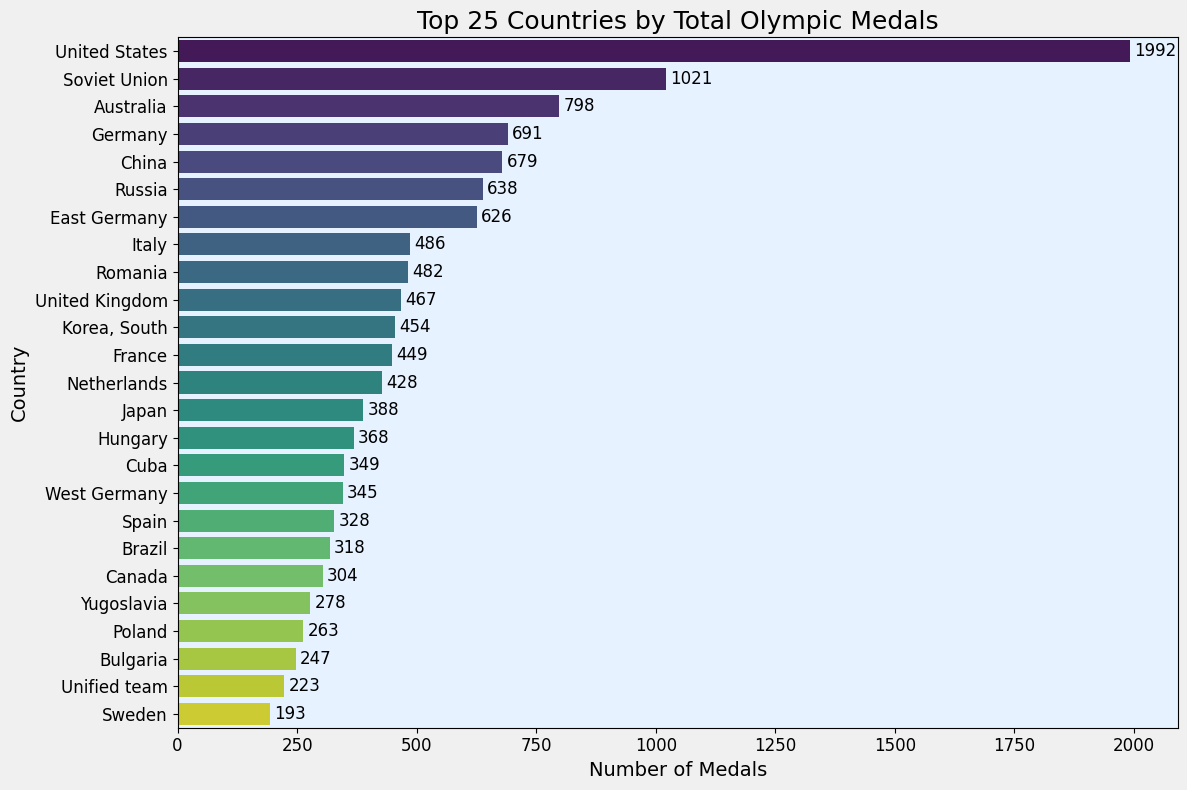

In [23]:
plt.figure(figsize=(12, 8), facecolor='#f0f0f0')
ax = sns.barplot(y=top_25['Country'], x= top_25['count'], data=top_25, hue = top_25['Country'], palette='viridis')
ax.set_facecolor('#e6f2ff')
plt.title('Top 25 Countries by Total Olympic Medals', fontsize=18)
plt.xlabel("Number of Medals", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for i in ax.containers:
  ax.bar_label(i, fmt='%.0f', fontsize=12, label_type='edge', padding=3)


plt.tight_layout()
plt.show()

# Medals Over the Years

In [24]:
medals_by_year = olympic_data.groupby('Year')['Medal'].count().reset_index()
medals_by_year

,Year,Medal
0,1976.0,1305
1,1980.0,1387
2,1984.0,1459
3,1988.0,1546
4,1992.0,1705
5,1996.0,1859
6,2000.0,2015
7,2004.0,1998
8,2008.0,2042


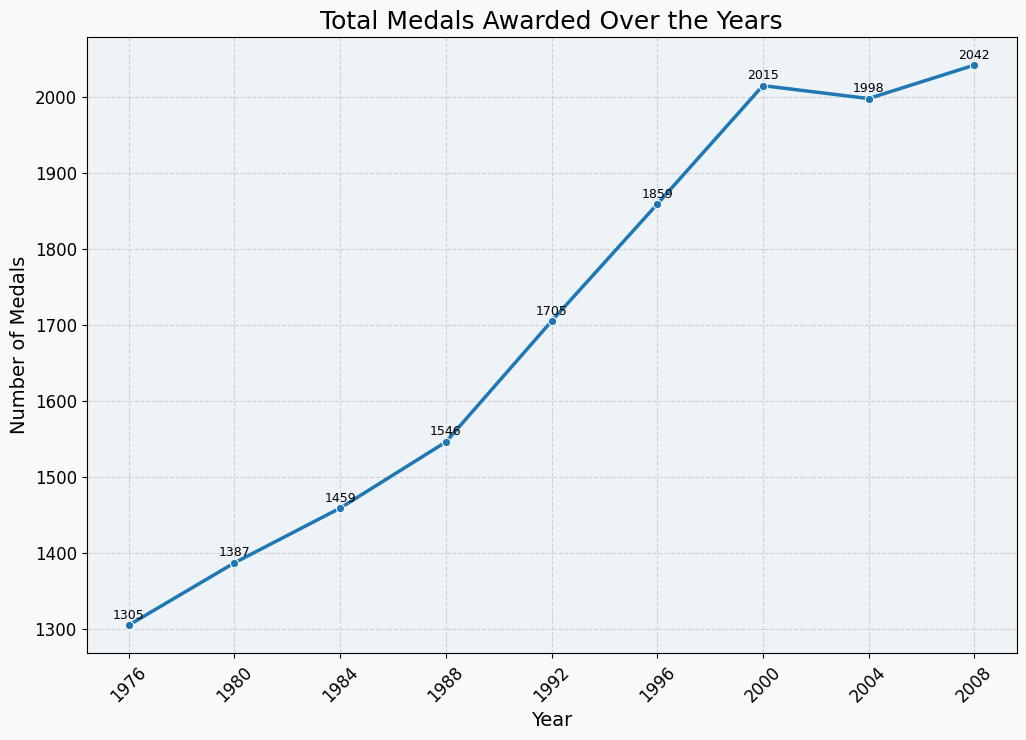

In [25]:
plt.figure(figsize=(12, 8), facecolor='#f9f9f9')
ax = sns.lineplot(data=medals_by_year, x='Year', y='Medal', marker='o', linewidth=2.5)
ax.set_facecolor('#eef3f7')
plt.title("Total Medals Awarded Over the Years", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Medals", fontsize=14)
plt.xticks(medals_by_year['Year'].unique(), rotation=45, fontsize=12)
plt.yticks(fontsize=12)

for x, y in zip(medals_by_year['Year'], medals_by_year['Medal']):
    plt.text(x, y + 5, str(y), ha='center', va='bottom', fontsize=9)

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Medal Distribution by Gender

In [26]:
gender_dist = olympic_data['Gender'].value_counts()
gender_dist

Men      9388
Women    5928
Name: Gender, dtype: int64

# Medal Distribution by Gender

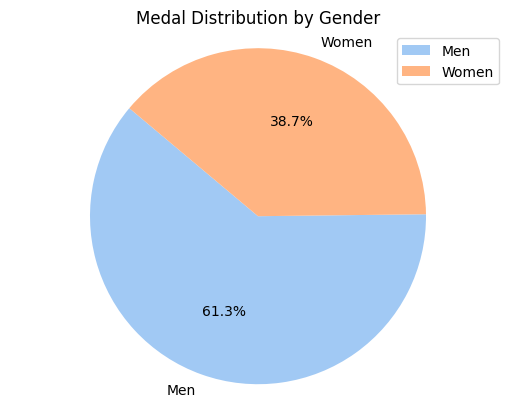

In [27]:
plt.pie(gender_dist, labels = gender_dist.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Medal Distribution by Gender")
plt.axis('equal')
plt.legend()
plt.show()

# Sports by Number of Events

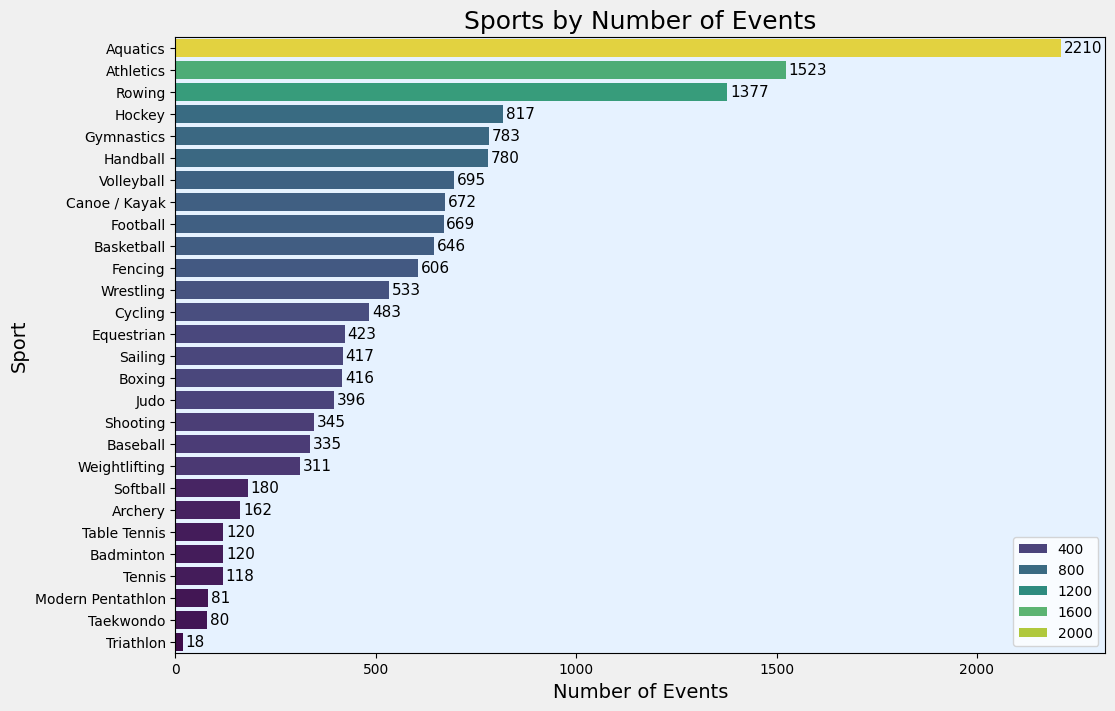

In [28]:
plt.figure(figsize=(12, 8), facecolor='#f0f0f0')
top_sports = olympic_data['Sport'].value_counts()
ax = sns.barplot(x=top_sports.values, y=top_sports.index, hue = top_sports.values, palette='viridis')
ax.set_facecolor('#e6f2ff')
plt.title("Sports by Number of Events", fontsize=18)
plt.xlabel("Number of Events", fontsize=14)
plt.ylabel("Sport", fontsize=14)

for i in ax.containers:
  ax.bar_label(i, fmt='%.0f', fontsize=11, label_type='edge', padding=2)

plt.show()

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_18292\1907191103.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=olympic_data, x='Medal', order=['Gold', 'Silver', 'Bronze'], palette='Set2')


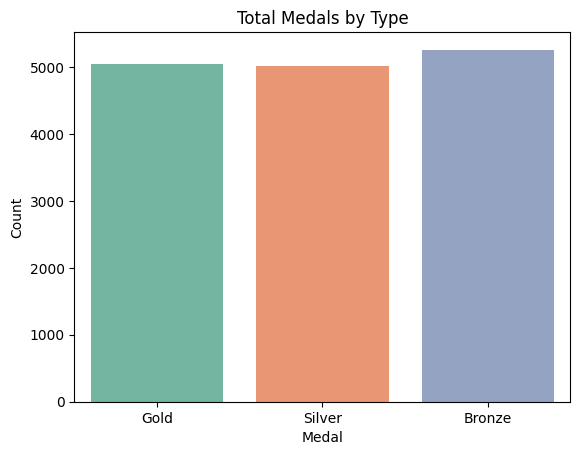

In [29]:
sns.countplot(data=olympic_data, x='Medal', order=['Gold', 'Silver', 'Bronze'], palette='Set2')
plt.title("Total Medals by Type")
plt.ylabel("Count")
plt.show()

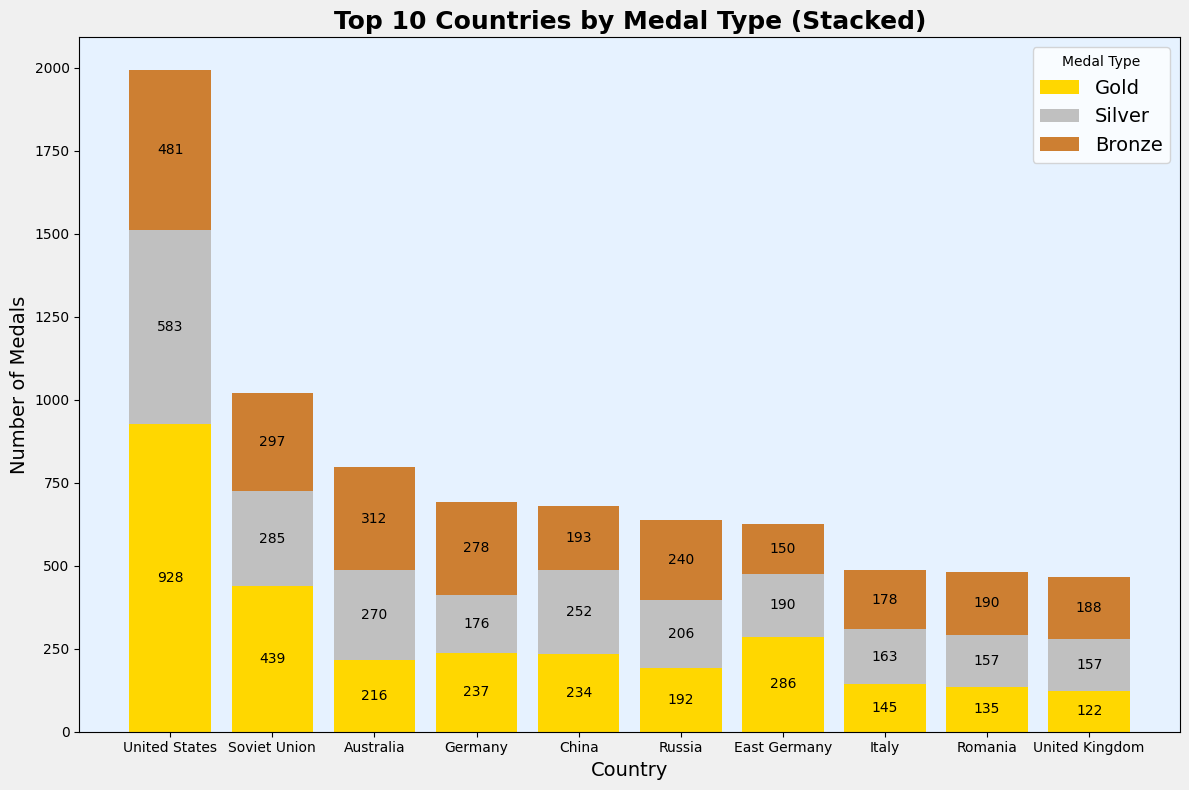

In [ ]:
medal_counts = olympic_data.groupby(['Country', 'Medal']).size().unstack(fill_value=0)

medal_counts['Total'] = medal_counts.sum(axis=1)
top_10 = medal_counts.sort_values('Total', ascending=False).head(10)
top_10 = top_10.drop(columns='Total')

top_10 = top_10[['Gold', 'Silver', 'Bronze']]

fig, ax = plt.subplots(figsize=(12, 8), facecolor='#f0f0f0')
ax.set_facecolor('#e6f2ff')
colors = ['#FFD700', '#C0C0C0', '#cd7f32']

bottom = [0] * len(top_10)
for idx, medal in enumerate(top_10.columns):
    bars = ax.bar(top_10.index, top_10[medal], bottom=bottom, color=colors[idx], label=medal)

    # Add numbers on bars
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{int(height)}',
                ha='center', va='center', fontsize=10, color='black'
            )
    bottom = [i + j for i, j in zip(bottom, top_10[medal])]

ax.set_title('Top 10 Countries by Medal Type (Stacked)', fontsize=18, weight='bold')
ax.set_xlabel('Country', fontsize=14)
ax.set_ylabel('Number of Medals', fontsize=14)
ax.legend(title='Medal Type', fontsize=14)
plt.tight_layout()
plt.show()

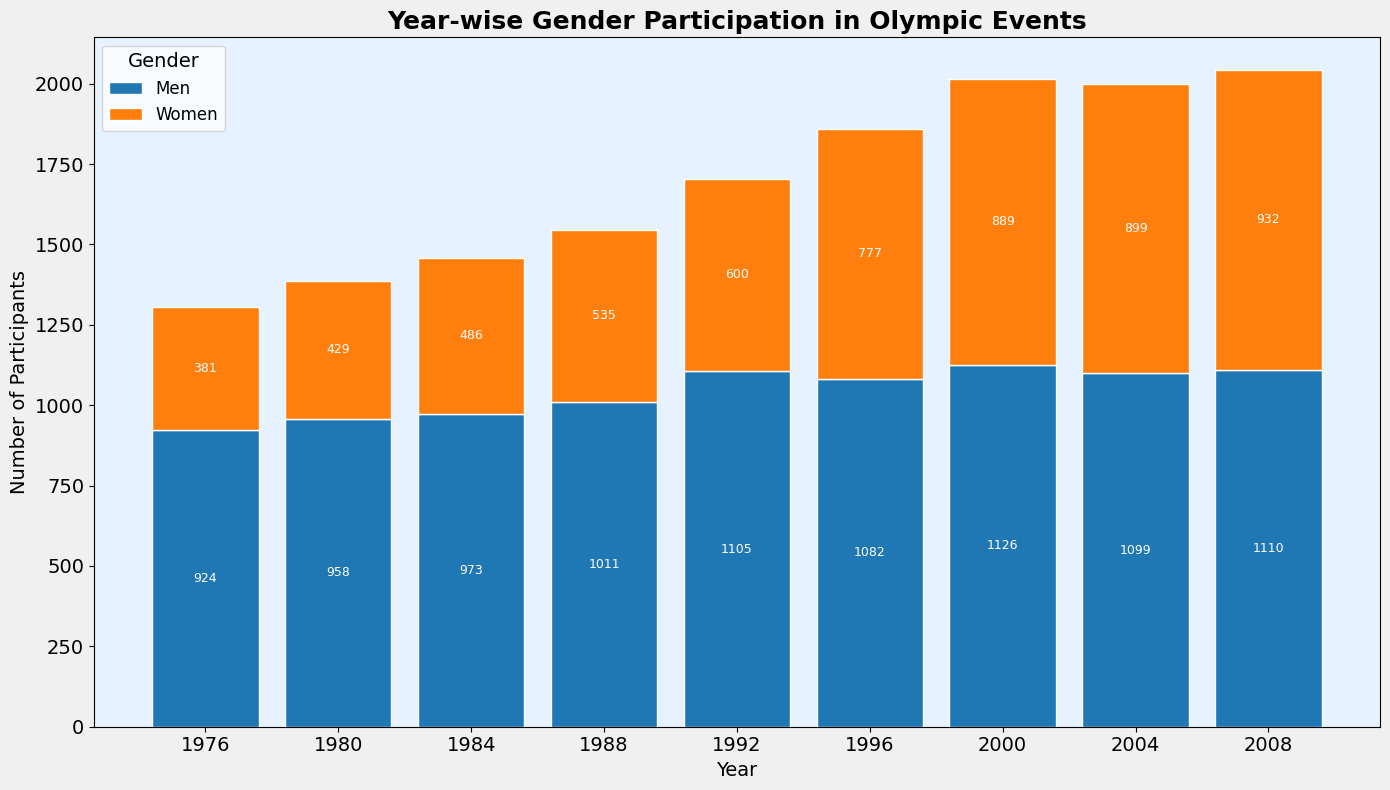

In [31]:
filtered_data = olympic_data[olympic_data['Year'] >= 1976]

gender_participation = filtered_data.groupby(['Year', 'Gender']).size().unstack(fill_value=0)
gender_participation = gender_participation.sort_index()

fig, ax = plt.subplots(figsize=(14, 8), facecolor='#f0f0f0')
ax.set_facecolor('#e6f2ff')

# Custom bar width and positions
bar_width = 0.8
years = gender_participation.index
x_pos = range(len(years))

colors = ['#1f77b4', '#ff7f0e']

# Plot stacked bars
bottom = [0] * len(years)
for idx, gender in enumerate(gender_participation.columns):
    values = gender_participation[gender]
    bars = ax.bar(
        x_pos,
        values,
        bottom=bottom,
        width=bar_width,
        label=gender,
        color=colors[idx],
        edgecolor='white'
    )

    # Add value labels inside bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{int(height)}',
                ha='center',
                va='center',
                fontsize=9,
                color='white'
            )

    bottom = [i + j for i, j in zip(bottom, values)]

ax.set_title('Year-wise Gender Participation in Olympic Events', fontsize=18, weight='bold')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Number of Participants', fontsize=14)
ax.set_xticks(x_pos)
ax.set_xticklabels([int(year) for year in years], fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(title='Gender', fontsize=12, title_fontsize=14)

plt.tight_layout()
plt.show()

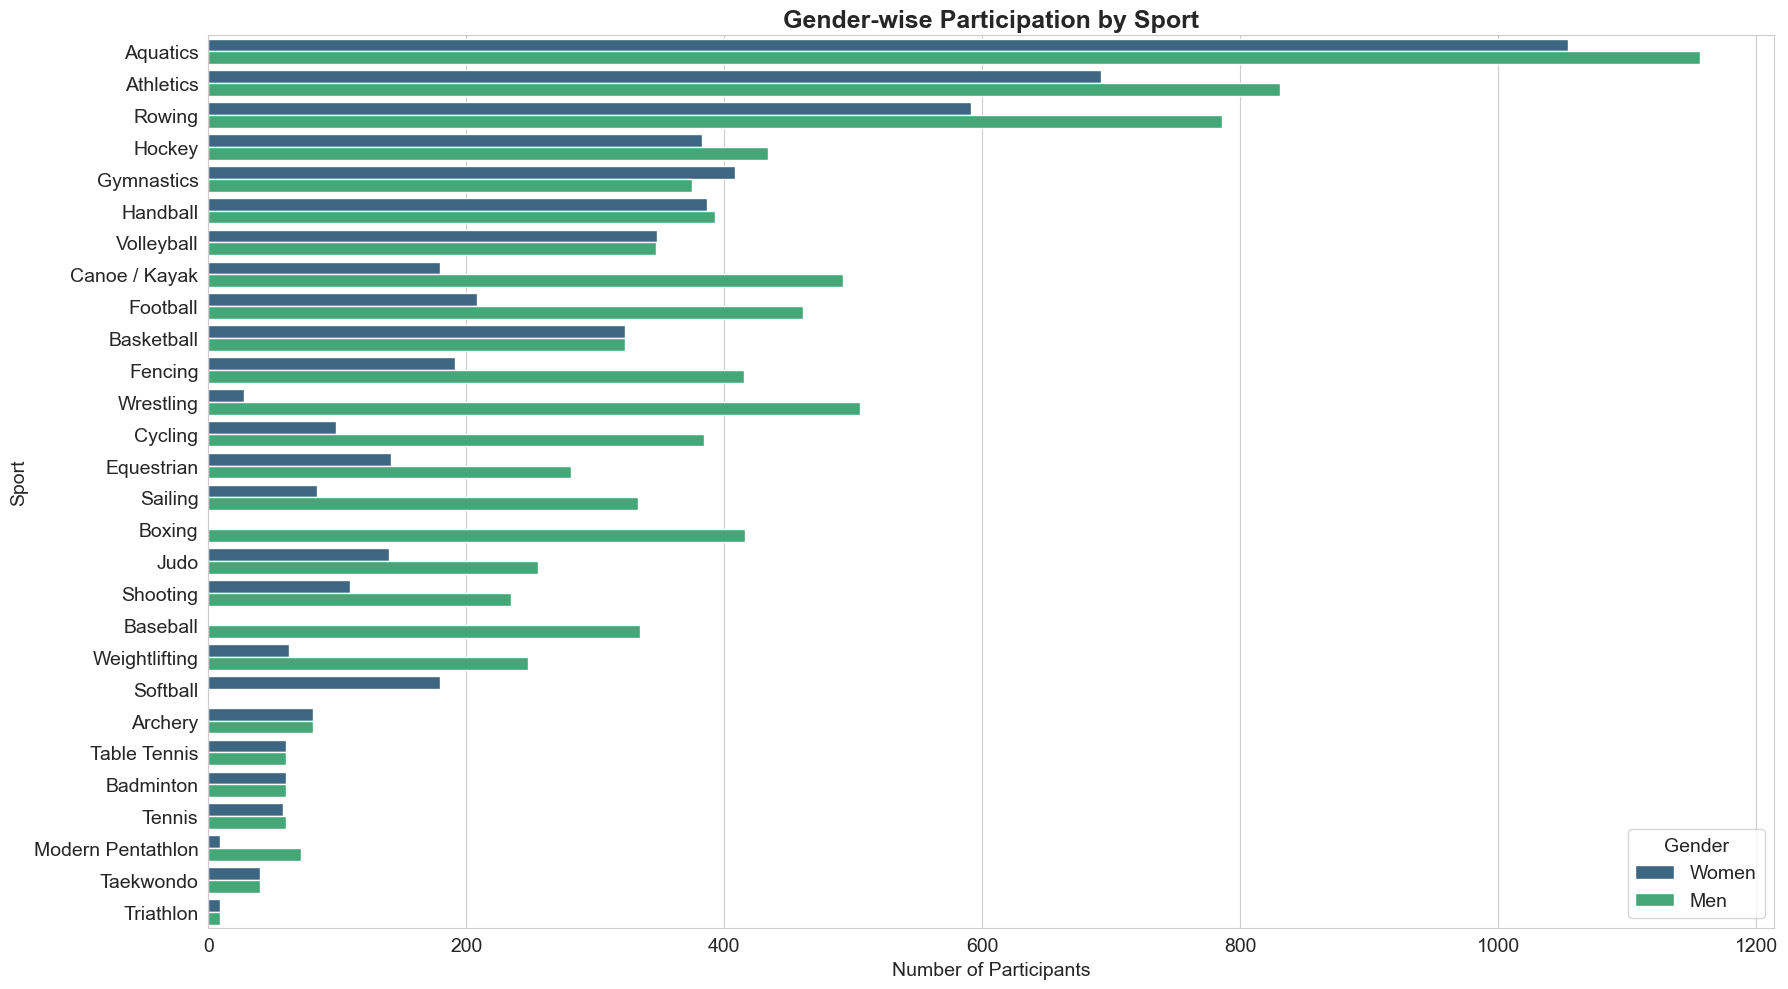

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 10))
sns.set_style("whitegrid")


ax = sns.countplot(
    data=olympic_data,
    y='Sport',
    hue='Gender',
    palette='viridis',
    order=olympic_data['Sport'].value_counts().index
)

plt.title('Gender-wise Participation by Sport', fontsize=18, weight='bold')
plt.xlabel('Number of Participants', fontsize=14)
plt.ylabel('Sport', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Gender', fontsize=14, title_fontsize=14)
plt.tight_layout()
plt.show()

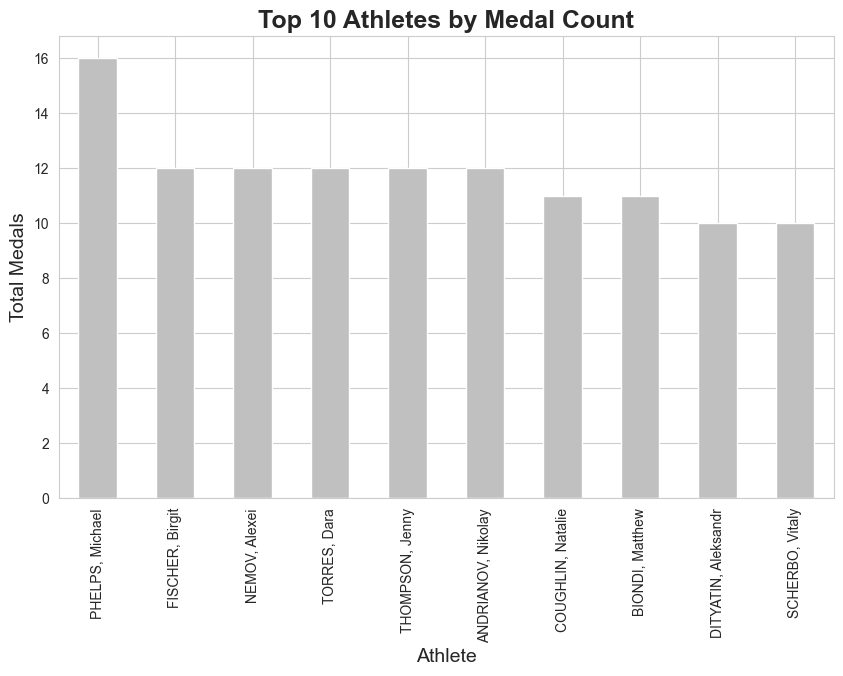

In [33]:
athlete_medal_count = olympic_data.groupby('Athlete')['Medal'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
athlete_medal_count.head(10).plot(kind='bar', color='silver')
plt.title("Top 10 Athletes by Medal Count", fontsize=18, weight='bold')
plt.xlabel("Athlete", fontsize=14)
plt.ylabel("Total Medals", fontsize=14)
plt.show()

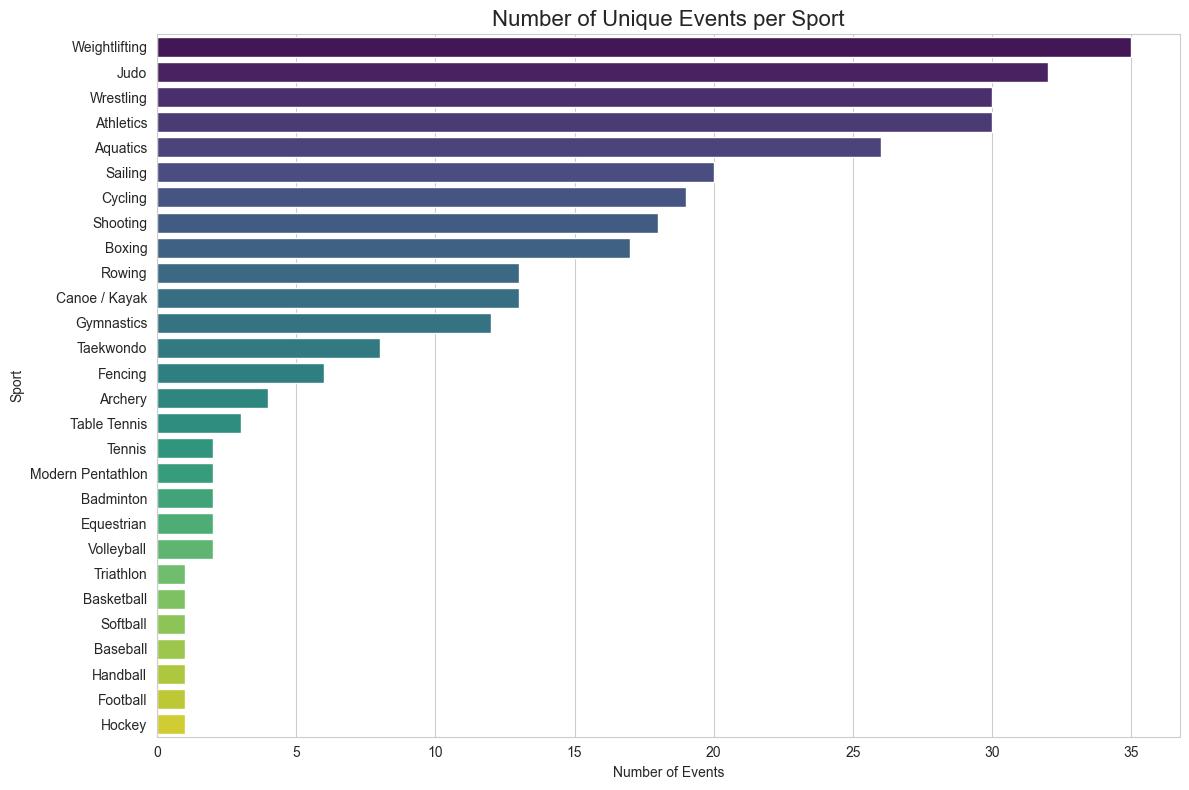

In [35]:
events_per_sport = olympic_data.groupby('Sport')['Event'].nunique().reset_index()
events_per_sport = events_per_sport.sort_values(by='Event', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(data=events_per_sport, y='Sport', x='Event', hue = 'Sport', palette='viridis')
plt.title('Number of Unique Events per Sport', fontsize=16)
plt.xlabel('Number of Events')
plt.ylabel('Sport')
plt.tight_layout()
plt.show()

In [ ]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


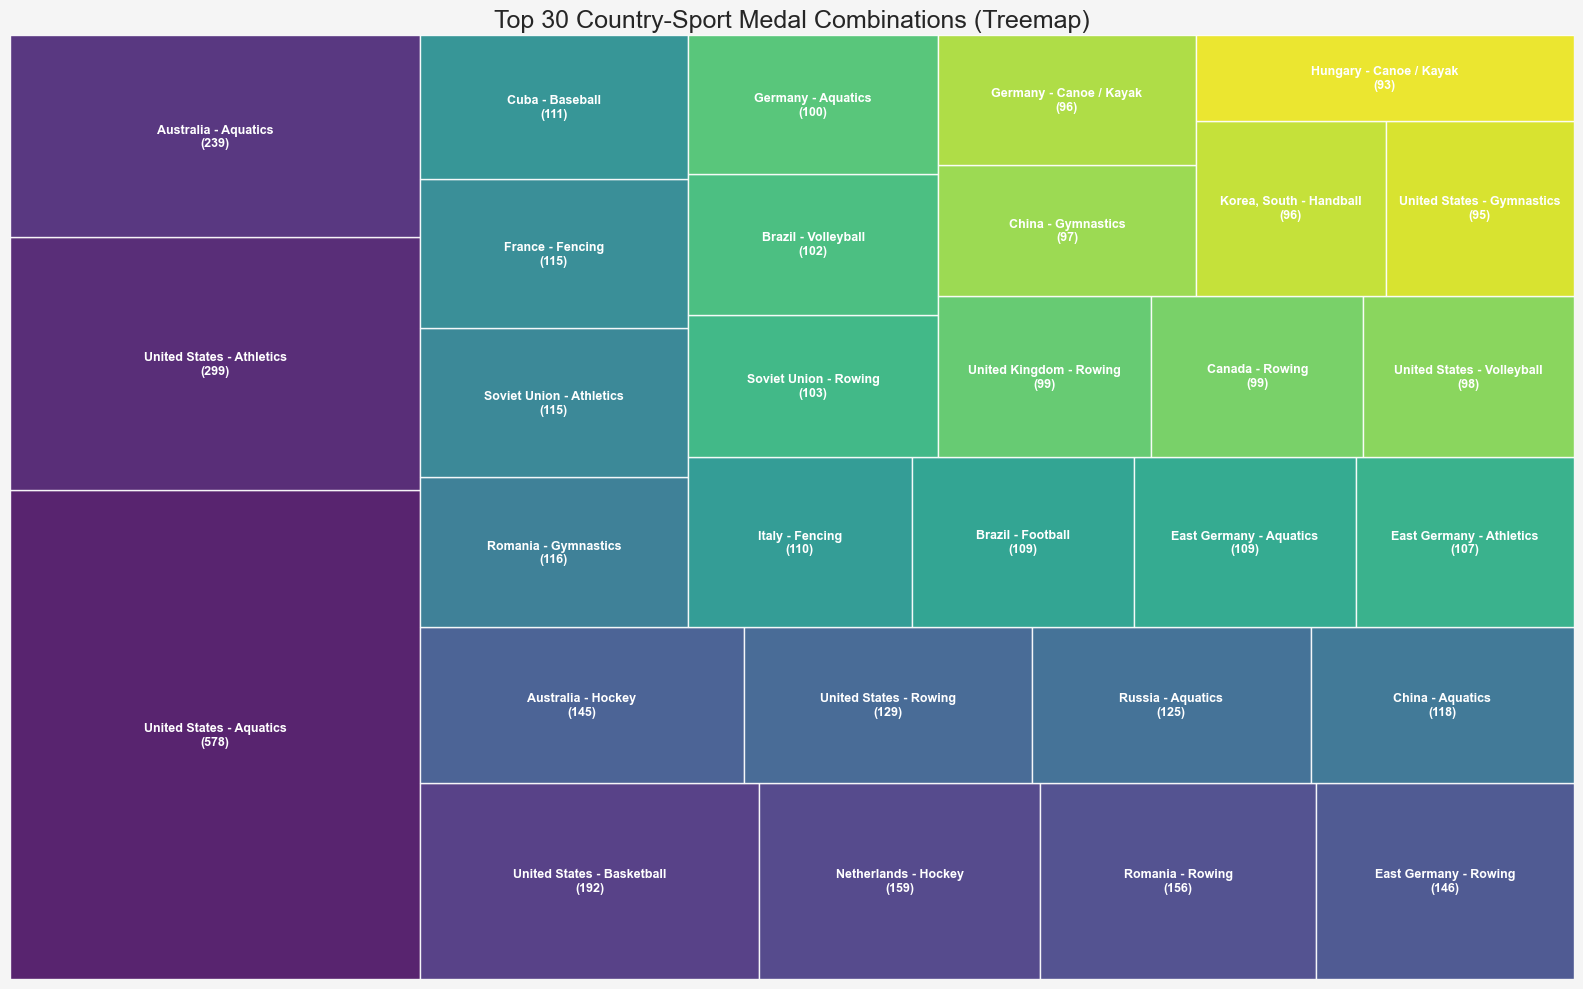

In [37]:
import squarify

medal_counts = olympic_data.groupby(['Country', 'Sport']).size().reset_index(name='Medal_Count')
top_medals = medal_counts.sort_values(by='Medal_Count', ascending=False).head(30)

# Labels
top_medals['Label'] = top_medals['Country'] + " - " + top_medals['Sport'] + "\n(" + top_medals['Medal_Count'].astype(str) + ")"

# Plot
colors = sns.color_palette('viridis', len(top_medals))
plt.figure(figsize=(16, 10), facecolor='#f5f5f5')
squarify.plot(
    sizes=top_medals['Medal_Count'],
    label=top_medals['Label'],
    alpha=0.9,
    color=colors,
    text_kwargs={'fontsize':9, 'color':'white', 'weight':'bold'})

plt.title('Top 30 Country-Sport Medal Combinations (Treemap)', fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()

# Country-level medal prediction


# *   Random Forest Regressor
# *   Because dataset have mixed feature types and country/year interaction

In [38]:
medal_counts = olympic_data.groupby(['Country', 'Year']).size().reset_index(name='Total_Medals')
sport_count = olympic_data.groupby(['Country', 'Year'])['Sport'].nunique().reset_index(name='Sport_Count')
medal_counts = medal_counts.merge(sport_count, on=['Country', 'Year'])
medal_counts

,Country,Year,Total_Medals,Sport_Count
0,Afghanistan,2008.0,1,1
1,Algeria,1984.0,2,1
2,Algeria,1992.0,2,2
3,Algeria,1996.0,3,2
4,Algeria,2000.0,5,2
...,...,...,...,...
554,Zambia,1984.0,1,1
555,Zambia,1996.0,1,1
556,Zimbabwe,1980.0,16,1
557,Zimbabwe,2004.0,3,1


In [39]:
medal_types = olympic_data.pivot_table(index=['Country', 'Year'],
                                       columns='Medal',
                                       aggfunc='size',
                                       fill_value=0).reset_index()

medal_types.columns.name = None
medal_types.rename(columns={'Gold': 'Gold_Count', 'Silver': 'Silver_Count', 'Bronze': 'Bronze_Count'}, inplace=True)
medal_types

,Country,Year,Bronze_Count,Gold_Count,Silver_Count
0,Afghanistan,2008.0,1,0,0
1,Algeria,1984.0,2,0,0
2,Algeria,1992.0,1,1,0
3,Algeria,1996.0,1,2,0
4,Algeria,2000.0,3,1,1
...,...,...,...,...,...
554,Zambia,1984.0,1,0,0
555,Zambia,1996.0,0,0,1
556,Zimbabwe,1980.0,0,16,0
557,Zimbabwe,2004.0,1,1,1


In [40]:
medal_counts = medal_counts.merge(medal_types, on=['Country', 'Year'], how='left')
medal_counts

,Country,Year,Total_Medals,Sport_Count,Bronze_Count,Gold_Count,Silver_Count
0,Afghanistan,2008.0,1,1,1,0,0
1,Algeria,1984.0,2,1,2,0,0
2,Algeria,1992.0,2,2,1,1,0
3,Algeria,1996.0,3,2,1,2,0
4,Algeria,2000.0,5,2,3,1,1
...,...,...,...,...,...,...,...
554,Zambia,1984.0,1,1,1,0,0
555,Zambia,1996.0,1,1,0,0,1
556,Zimbabwe,1980.0,16,1,0,16,0
557,Zimbabwe,2004.0,3,1,1,1,1


In [41]:
le_country = LabelEncoder()
medal_counts['Country_encoded'] = le_country.fit_transform(medal_counts['Country'])

In [42]:
X = medal_counts[['Year', 'Country_encoded', 'Sport_Count', 'Gold_Count', 'Silver_Count', 'Bronze_Count']]
y = np.log1p(medal_counts['Total_Medals'])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [45]:
y_pred = rf_model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.9897301100516385
RMSE: 0.0214730354614374


We used Random Forest Regression with log transformation to predict country-level Olympic medals. The model achieved an R² score of 0.989 and RMSE of ~0.021, indicating highly accurate predictions with very low error — typically less than 1 medal off per prediction.

In [46]:
data_2008 = medal_counts[medal_counts['Year'] == 2008].copy()

X_2008 = data_2008[['Year', 'Country_encoded', 'Sport_Count', 'Gold_Count', 'Silver_Count', 'Bronze_Count']]
y_pred_2008 = rf_model.predict(X_2008)
data_2008['Predicted_Total_Medals_log'] = y_pred_2008
data_2008['Predicted_Total_Medals'] = np.expm1(y_pred_2008)

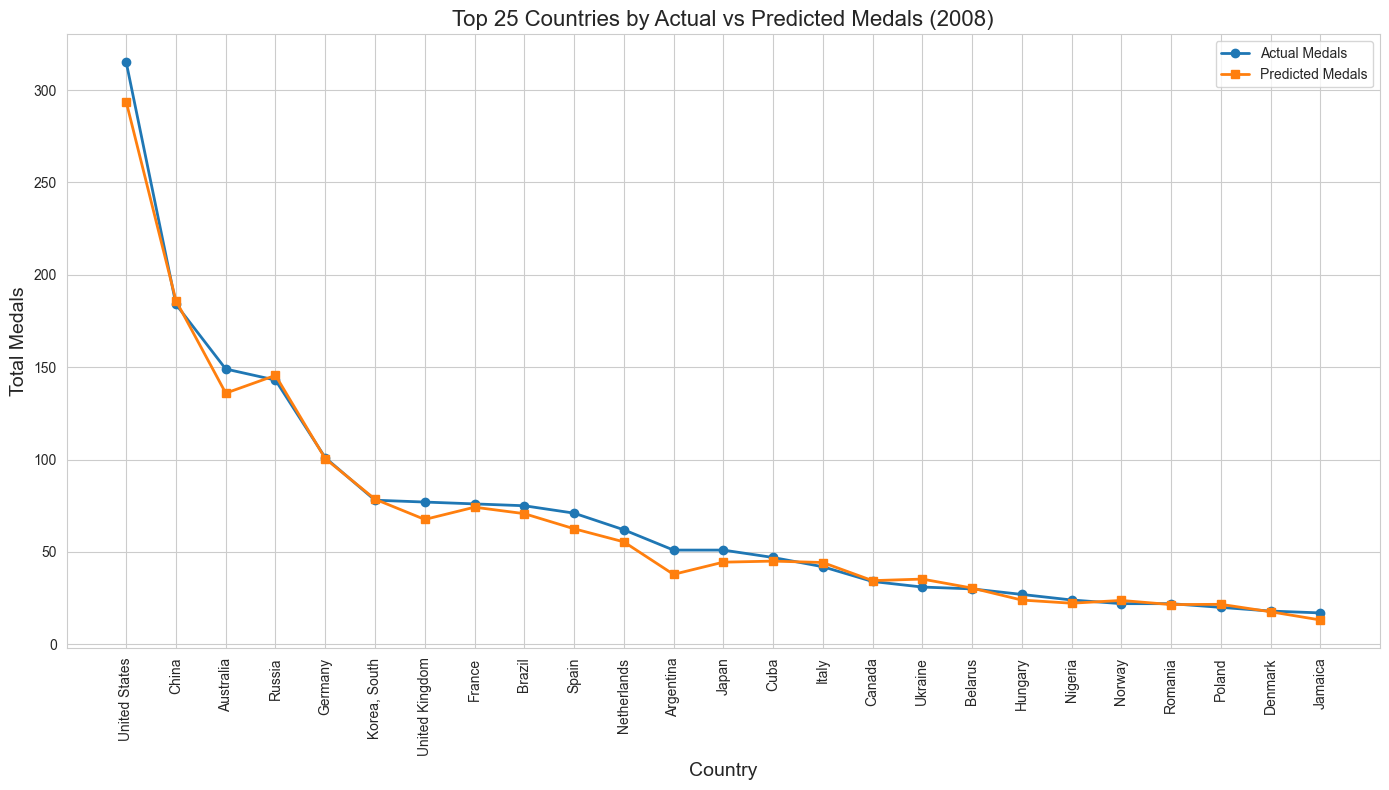

In [47]:
top_25_2008 = data_2008.nlargest(25, 'Total_Medals')

plt.figure(figsize=(14, 8))
plt.plot(top_25_2008['Country'], top_25_2008['Total_Medals'], marker='o', label='Actual Medals', linewidth=2)
plt.plot(top_25_2008['Country'], top_25_2008['Predicted_Total_Medals'], marker='s', label='Predicted Medals', linewidth=2)

plt.title('Top 25 Countries by Actual vs Predicted Medals (2008)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Medals', fontsize=14)
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [48]:
import joblib

# Save the model
joblib.dump(rf_model, 'rf_medal_predictor.pkl')

# Optionally, save the LabelEncoder as well (to encode user-selected country names)
joblib.dump(le_country, 'label_encoder_country.pkl')

['label_encoder_country.pkl']